In [1]:
# // Load a blur (gaussian blur) image and apply laplacian masks over it and display the sharpened image
import numpy as np
import cv2
import matplotlib.pyplot as plt  


In [2]:
image = cv2.imread('p5.jpg') 


image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

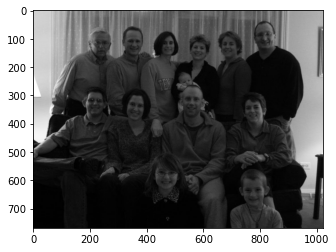

In [3]:
plt.imshow(image_rgb)

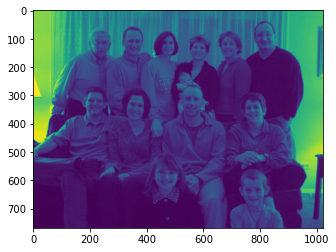

In [4]:
plt.imshow(image_gray)

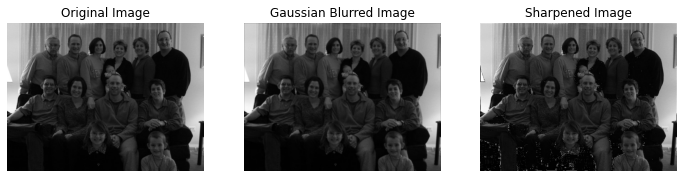

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def gaussian_kernel(size: int, sigma: float):
    kernel = np.fromfunction(
        lambda x, y: (1/ (2 * np.pi * sigma ** 2)) * np.exp(
            -((x - (size - 1) / 2) ** 2 + (y - (size - 1) / 2) ** 2) / (2 * sigma ** 2)
        ),
        (size, size)
    )
    return kernel / np.sum(kernel)  


def convolve2d(image: np.ndarray, kernel: np.ndarray):
 
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    

    output_image = np.zeros_like(image)
    
    for i in range(image_height):
        for j in range(image_width):
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            output_image[i, j] = np.sum(region * kernel)
    
    return output_image


def laplacian_filter(image: np.ndarray):
   
    laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
  
    return convolve2d(image, laplacian_kernel)


def sharpen_image(image: np.ndarray, blurred_image: np.ndarray, laplacian_image: np.ndarray):
 
    sharpened_image = blurred_image - laplacian_image
 
    sharpened_image = np.clip(sharpened_image, 0, 255)
    
    return sharpened_image


def process_image(image_path: str):

    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    
    if image is None:
        print(f"Error: Unable to load image from {image_path}")
        return
    

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    

    kernel_size = 5
    sigma = 1.0
    gaussian_kernel_ = gaussian_kernel(kernel_size, sigma)
    blurred_image = convolve2d(gray_image, gaussian_kernel_)
    

    laplacian_image = laplacian_filter(blurred_image)
    

    sharpened_image = sharpen_image(gray_image, blurred_image, laplacian_image)
    

    plt.figure(figsize=(12, 6))
    

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 
    plt.title('Original Image')
    plt.axis('off')
    
   
    plt.subplot(1, 3, 2)
    plt.imshow(blurred_image, cmap='gray')
    plt.title('Gaussian Blurred Image')
    plt.axis('off')
    
   
    plt.subplot(1, 3, 3)
    plt.imshow(sharpened_image, cmap='gray')
    plt.title('Sharpened Image')
    plt.axis('off')
    
    plt.show()


image_path = 'p5.jpg'
process_image(image_path)


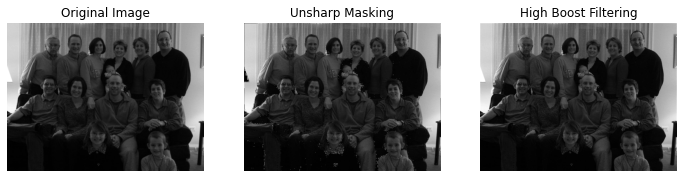

In [10]:
# perform unsharp masking and high boost filtering by using gaussian filtering......

def unsharp_masking(image: np.ndarray, kernel_size: int, sigma: float):
    """Apply unsharp masking using Gaussian blur."""
   
    gaussian_kernel_ = gaussian_kernel(kernel_size, sigma)
    
    
    blurred_image = convolve2d(image, gaussian_kernel_)
    
 
    mask = image - blurred_image
    
   
    sharpened_image = image + mask
    sharpened_image = np.clip(sharpened_image, 0, 255)
    
    return sharpened_image


def high_boost_filtering(image: np.ndarray, kernel_size: int, sigma: float, alpha: float):

    gaussian_kernel_ = gaussian_kernel(kernel_size, sigma)
  
    blurred_image = convolve2d(image, gaussian_kernel_)
    
    high_boost_image = alpha * image - (alpha - 1) * blurred_image
    high_boost_image = np.clip(high_boost_image, 0, 255)
    
    return high_boost_image

def process_image(image_path: str):

    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    
    if image is None:
        print(f"Error: Unable to load image from {image_path}")
        return
    
   
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    

    kernel_size = 5
    sigma = 1.0

    unsharp_image = unsharp_masking(gray_image, kernel_size, sigma)
    

    alpha = 2.0
    high_boost_image = high_boost_filtering(gray_image, kernel_size, sigma, alpha)
    

    plt.figure(figsize=(12, 6))
    

    plt.subplot(1, 3, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    

    plt.subplot(1, 3, 2)
    plt.imshow(unsharp_image, cmap='gray')
    plt.title('Unsharp Masking')
    plt.axis('off')
    

    plt.subplot(1, 3, 3)
    plt.imshow(high_boost_image, cmap='gray')
    plt.title('High Boost Filtering')
    plt.axis('off')
    
    plt.show()


image_path = 'p5.jpg'
process_image(image_path)


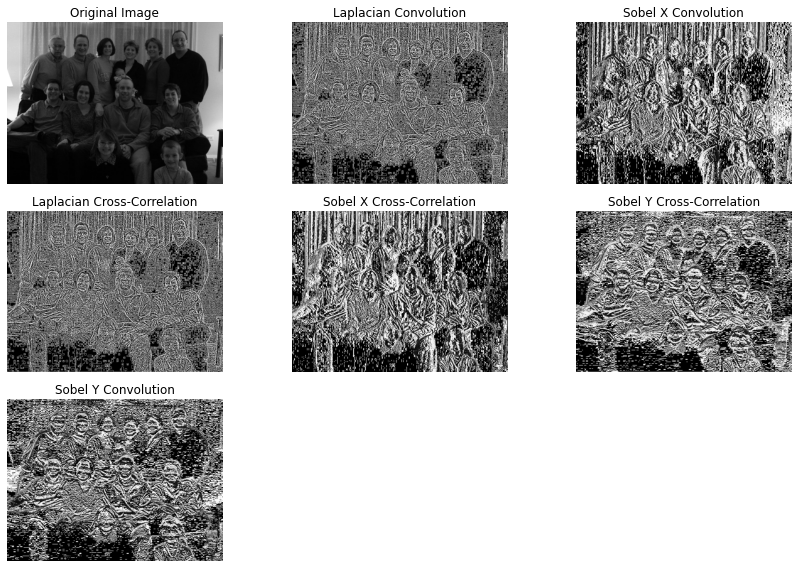

In [9]:
# apply convolution and cross correlation of same kenel (kernel laplacian sobel

def apply_kernel(image: np.ndarray, kernel: np.ndarray, is_convolution: bool):

    pad_height = kernel.shape[0] // 2
    pad_width = kernel.shape[1] // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    

    output_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i + kernel.shape[0], j:j + kernel.shape[1]]
            if is_convolution:
                region = np.flip(region)  
            output_image[i, j] = np.sum(region * kernel)
    
    return output_image

def process_image(image_path: str):

    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    
    if image is None:
        print(f"Error: Unable to load image from {image_path}")
        return
    

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
   
    laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    sobel_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  
    sobel_kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  
    

    laplacian_conv = apply_kernel(gray_image, laplacian_kernel, is_convolution=True)
    sobel_conv_x = apply_kernel(gray_image, sobel_kernel_x, is_convolution=True)
    sobel_conv_y = apply_kernel(gray_image, sobel_kernel_y, is_convolution=True)
    

    laplacian_corr = apply_kernel(gray_image, laplacian_kernel, is_convolution=False)
    sobel_corr_x = apply_kernel(gray_image, sobel_kernel_x, is_convolution=False)
    sobel_corr_y = apply_kernel(gray_image, sobel_kernel_y, is_convolution=False)
    

    plt.figure(figsize=(12, 8))
    

    plt.subplot(3, 3, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
 
    plt.subplot(3, 3, 2)
    plt.imshow(laplacian_conv, cmap='gray')
    plt.title('Laplacian Convolution')
    plt.axis('off')
    

    plt.subplot(3, 3, 3)
    plt.imshow(sobel_conv_x, cmap='gray')
    plt.title('Sobel X Convolution')
    plt.axis('off')
    

    plt.subplot(3, 3, 4)
    plt.imshow(laplacian_corr, cmap='gray')
    plt.title('Laplacian Cross-Correlation')
    plt.axis('off')
    

    plt.subplot(3, 3, 5)
    plt.imshow(sobel_corr_x, cmap='gray')
    plt.title('Sobel X Cross-Correlation')
    plt.axis('off')
    

    plt.subplot(3, 3, 6)
    plt.imshow(sobel_corr_y, cmap='gray')
    plt.title('Sobel Y Cross-Correlation')
    plt.axis('off')
    

    plt.subplot(3, 3, 7)
    plt.imshow(sobel_conv_y, cmap='gray')
    plt.title('Sobel Y Convolution')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()


image_path = 'p5.jpg'
process_image(image_path)


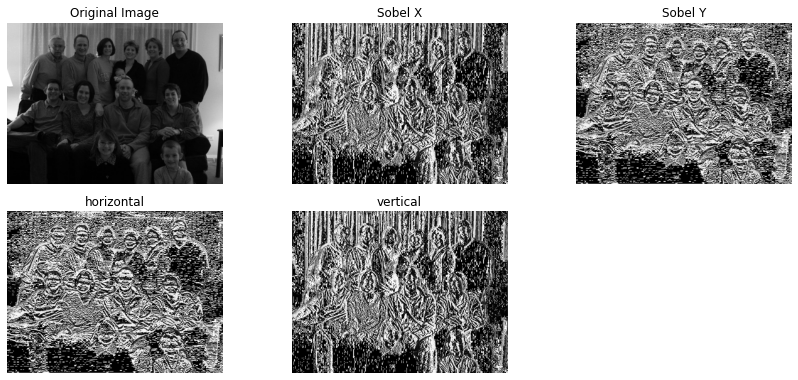

In [13]:
# Apply 3x3 kernel for edge detection (horizontal, vertical, sobel)....

def apply_kernel(image: np.ndarray, kernel: np.ndarray):

    pad_height = kernel.shape[0] // 2
    pad_width = kernel.shape[1] // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    

    output_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i + kernel.shape[0], j:j + kernel.shape[1]] 
            output_image[i, j] = np.sum(region * kernel)
    
    return output_image
def process_image(image_path: str):

    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    
    if image is None:
        print(f"Error: Unable to load image from {image_path}")
        return
    

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    horizontal_kernel = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]) 
    vertical_kernel = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]) 
   
    sobel_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  
    sobel_kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  
    

  
    sobel_x = apply_kernel(gray_image, sobel_kernel_x)
    sobel_y = apply_kernel(gray_image, sobel_kernel_y)
    horizontal = apply_kernel(gray_image, horizontal_kernel)
    vertical = apply_kernel(gray_image, vertical_kernel)
    
    

    plt.figure(figsize=(12, 8))
    

    plt.subplot(3, 3, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')


    plt.subplot(3, 3, 2)
    plt.imshow(sobel_x, cmap='gray')
    plt.title('Sobel X')
    plt.axis('off')
    

    plt.subplot(3, 3, 3)
    plt.imshow(sobel_y, cmap='gray')
    plt.title('Sobel Y')
    plt.axis('off')

    plt.subplot(3, 3, 4)
    plt.imshow(horizontal, cmap='gray')
    plt.title('horizontal')
    plt.axis('off')

    plt.subplot(3, 3, 5)
    plt.imshow(vertical, cmap='gray')
    plt.title('vertical')
    plt.axis('off')

    
    
    plt.tight_layout()
    plt.show()


image_path = 'p5.jpg'
process_image(image_path)

